In [1]:
%cd ..

/home/marco/contrast-gan-3D


In [2]:
import torch
from matplotlib import pyplot as plt

import wandb
from contrast_gan_3D.alias import ScanType
from contrast_gan_3D.config import CHECKPOINTS_DIR
from contrast_gan_3D.eval import utils as eval_u
from contrast_gan_3D.eval.CCTAContrastCorrector import CCTAContrastCorrector
from contrast_gan_3D.experiments.conf_2D import generator_class as generator_class_2D
from contrast_gan_3D.experiments.gradient_penalty_conf import (
    generator_class as generator_class_3D,
)
from contrast_gan_3D.experiments.gradient_penalty_conf import scaler
from contrast_gan_3D.experiments.gradient_penalty_conf import (
    train_patch_size as inference_patch_size_3D,
)
from contrast_gan_3D.trainer.utils import divide_scans_in_fold
from contrast_gan_3D.utils import set_GPU

In [3]:
WANDB_ENTITY = "xqz-u"
WANDB_PROJECT = "contrast-gan-3D"

RUN_ID_2D = "g5gqrbqo"
model_checkpoint_2D = CHECKPOINTS_DIR / RUN_ID_2D / "10000.pt"
print(model_checkpoint_2D, model_checkpoint_2D.is_file())

RUN_ID_3D = "blwlllmf"
model_checkpoint_3D = CHECKPOINTS_DIR / RUN_ID_3D / "7000.pt"
print(model_checkpoint_3D, model_checkpoint_3D.is_file())

DEVICE = set_GPU(3)

/home/marco/contrast-gan-3D/logs/model_checkpoints/g5gqrbqo/10000.pt True
/home/marco/contrast-gan-3D/logs/model_checkpoints/blwlllmf/7000.pt True


In [4]:
corrector_2D = CCTAContrastCorrector(
    generator_class_2D,
    scaler,
    DEVICE,
    checkpoint_path=model_checkpoint_2D,
)

[2024-04-30 16:40:38,428: INFO] Loaded model checkpoint '/home/marco/contrast-gan-3D/logs/model_checkpoints/g5gqrbqo/10000.pt' (contrast_gan_3D.eval.CCTAContrastCorrector:57)


In [5]:
corrector_3D = CCTAContrastCorrector(
    generator_class_3D,
    scaler,
    DEVICE,
    inference_patch_size=inference_patch_size_3D,
    checkpoint_path=model_checkpoint_3D,
)

[2024-04-30 16:40:40,369: INFO] Loaded model checkpoint '/home/marco/contrast-gan-3D/logs/model_checkpoints/blwlllmf/7000.pt' (contrast_gan_3D.eval.CCTAContrastCorrector:57)


In [6]:
run = wandb.Api().run(
    "/".join([WANDB_ENTITY, WANDB_PROJECT, RUN_ID_2D])
)
evaluation_paths = run.config["val_folds"][1]
print(len(evaluation_paths))

scans_by_label = divide_scans_in_fold(evaluation_paths)
{k: len(v) for k, v in scans_by_label.items()}

60


{0: 34, 1: 21, -1: 5}

In [18]:
# pps = [
#     (f"/home/marco/data/{el}.h5", 1)
#     for el in [
#         "ASOCA_Philips/images/ASOCA-034",
#         "ASOCA_Philips/images/ASOCA-059",
#         "MMWHS/ct_test/ct_test_2003_image",
#     ]
# ]

# corrector_3D = CCTAContrastCorrector(
#     generator_class_3D,
#     scaler,
#     DEVICE,
#     inference_patch_size=inference_patch_size_3D,
#     checkpoint_path=model_checkpoint_3D,
# )

# voxels, corrected_voxels = eval_u.collect_voxels([p[0] for p in pps], corrector_3D)

# torch.cuda.empty_cache()

# plt.hist(corrected_voxels["centerlines"])

In [8]:
og_voxels, corrected_voxels_2D = eval_u.collect_evaluation_histograms(
    evaluation_paths, corrector_2D
)
torch.cuda.empty_cache()

ScanType.OPT 34
	Total voxels 'centerlines': 123332
	Total voxels 'ostia': 68
ScanType.LOW 5


/home/marco/data/ASOCA_Philips/images/ASOCA-034.h5:   0%|          | 0/14 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-059.h5:   0%|          | 0/14 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_test/ct_test_2003_image.h5:   0%|          | 0/18 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_test/ct_test_2019_image.h5:   0%|          | 0/19 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_train/ct_train_1019_image.h5:   0%|          | 0/19 [00:00<?, ?it/s]

	Total voxels 'centerlines': 13095
	Total voxels 'ostia': 10
ScanType.HIGH 21


/home/marco/data/ASOCA_Philips/images/ASOCA-006.h5:   0%|          | 0/13 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-011.h5:   0%|          | 0/13 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-013.h5:   0%|          | 0/14 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-015.h5:   0%|          | 0/13 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-017.h5:   0%|          | 0/11 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-036.h5:   0%|          | 0/14 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-040.h5:   0%|          | 0/12 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-043.h5:   0%|          | 0/12 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-044.h5:   0%|          | 0/11 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-045.h5:   0%|          | 0/12 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-050.h5:   0%|          | 0/14 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-051.h5:   0%|          | 0/14 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_test/ct_test_2007_image.h5:   0%|          | 0/18 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_test/ct_test_2013_image.h5:   0%|          | 0/18 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_test/ct_test_2015_image.h5:   0%|          | 0/18 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_test/ct_test_2022_image.h5:   0%|          | 0/15 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_test/ct_test_2033_image.h5:   0%|          | 0/14 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_test/ct_test_2036_image.h5:   0%|          | 0/21 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_train/ct_train_1004_image.h5:   0%|          | 0/13 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_train/ct_train_1018_image.h5:   0%|          | 0/12 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_train/ct_train_1020_image.h5:   0%|          | 0/23 [00:00<?, ?it/s]

	Total voxels 'centerlines': 83940
	Total voxels 'ostia': 42


In [9]:
# fig, ax = plt.subplots()

# for sc, v in og_voxels.items():
#     ax.hist(v, bins=80, alpha=0.5, density=True, label=sc.name)
# fig.legend()
# fig.suptitle("Arteries centerlines HU distribution")
# fig.tight_layout()
# plt.show()
# plt.close(fig)

In [10]:
_, corrected_voxels_3D = eval_u.collect_evaluation_histograms(
    evaluation_paths, corrector_3D
)
torch.cuda.empty_cache()

ScanType.OPT 34
	Total voxels 'centerlines': 123332
	Total voxels 'ostia': 68
ScanType.LOW 5


/home/marco/micromamba/envs/contrast-gan-3D/lib/python3.11/site-packages/patchly/array_like.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data)


/home/marco/data/ASOCA_Philips/images/ASOCA-034.h5:   0%|          | 0/2 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-059.h5:   0%|          | 0/2 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_test/ct_test_2003_image.h5:   0%|          | 0/3 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_test/ct_test_2019_image.h5:   0%|          | 0/3 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_train/ct_train_1019_image.h5:   0%|          | 0/3 [00:00<?, ?it/s]

	Total voxels 'centerlines': 13095
	Total voxels 'ostia': 10
ScanType.HIGH 21


/home/marco/data/ASOCA_Philips/images/ASOCA-006.h5:   0%|          | 0/2 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-011.h5:   0%|          | 0/2 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-013.h5:   0%|          | 0/2 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-015.h5:   0%|          | 0/2 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-017.h5:   0%|          | 0/2 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-036.h5:   0%|          | 0/2 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-040.h5:   0%|          | 0/2 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-043.h5:   0%|          | 0/2 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-044.h5:   0%|          | 0/2 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-045.h5:   0%|          | 0/2 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-050.h5:   0%|          | 0/2 [00:00<?, ?it/s]

/home/marco/data/ASOCA_Philips/images/ASOCA-051.h5:   0%|          | 0/2 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_test/ct_test_2007_image.h5:   0%|          | 0/3 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_test/ct_test_2013_image.h5:   0%|          | 0/3 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_test/ct_test_2015_image.h5:   0%|          | 0/3 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_test/ct_test_2022_image.h5:   0%|          | 0/2 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_test/ct_test_2033_image.h5:   0%|          | 0/2 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_test/ct_test_2036_image.h5:   0%|          | 0/3 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_train/ct_train_1004_image.h5:   0%|          | 0/2 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_train/ct_train_1018_image.h5:   0%|          | 0/2 [00:00<?, ?it/s]

/home/marco/data/MMWHS/ct_train/ct_train_1020_image.h5:   0%|          | 0/3 [00:00<?, ?it/s]

	Total voxels 'centerlines': 83940
	Total voxels 'ostia': 42


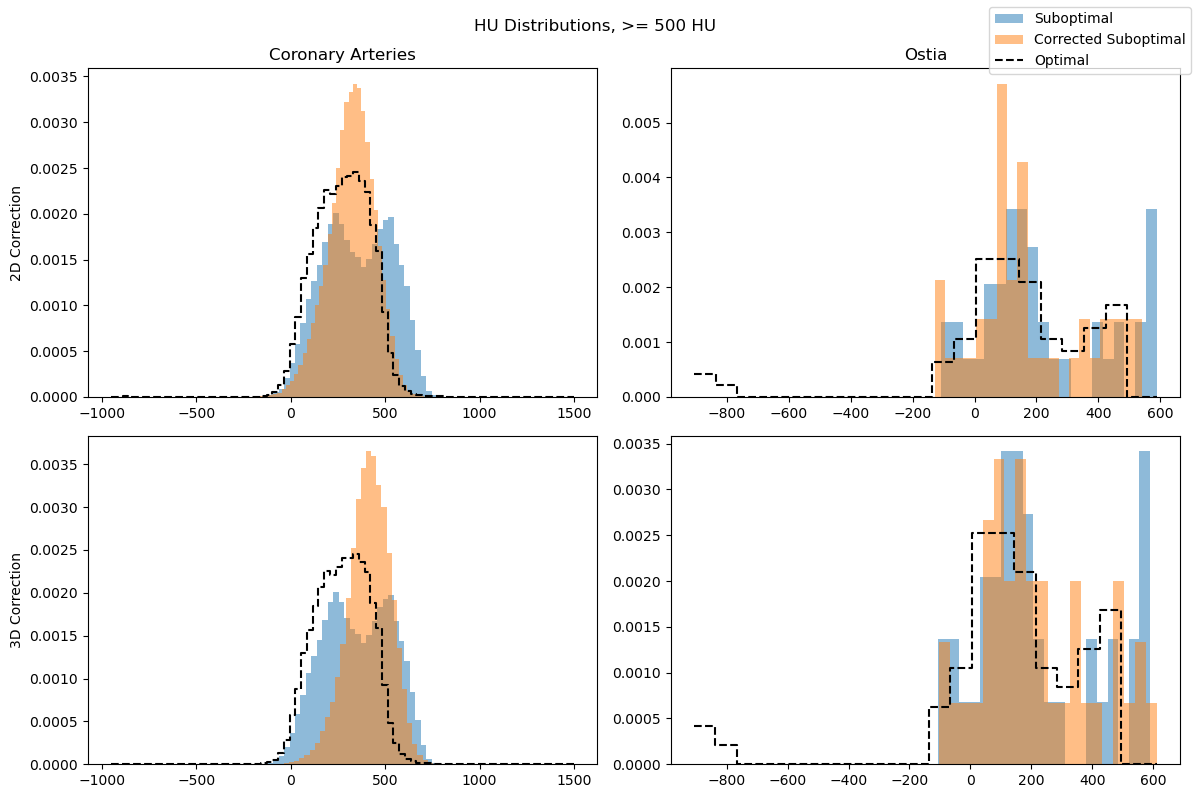

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("HU Distributions, >= 500 HU")

# for ax in axes.flat:
#     ax.set_xlim(-200, 800)
#     ax.set_ylim(0, 0.0075)
#     ax[i, j].set_yticks([])

for i, (raw, corrected) in enumerate(
    [[og_voxels, corrected_voxels_2D], [og_voxels, corrected_voxels_3D]]
):
    for j, tag in enumerate(["centerlines", "ostia"]):
        eval_u.plot_histograms(
            raw[ScanType.HIGH][tag],
            corrected[ScanType.HIGH][tag],
            raw[ScanType.OPT][tag],
            ax=axes[i, j],
            nbins=80 if j == 0 else 20,
        )

axes[0, 0].set_title("Coronary Arteries")
axes[0, 1].set_title("Ostia")
axes[0, 0].set_ylabel("2D Correction")
axes[1, 0].set_ylabel("3D Correction")

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels)
fig.tight_layout()
plt.show()
plt.close(fig)

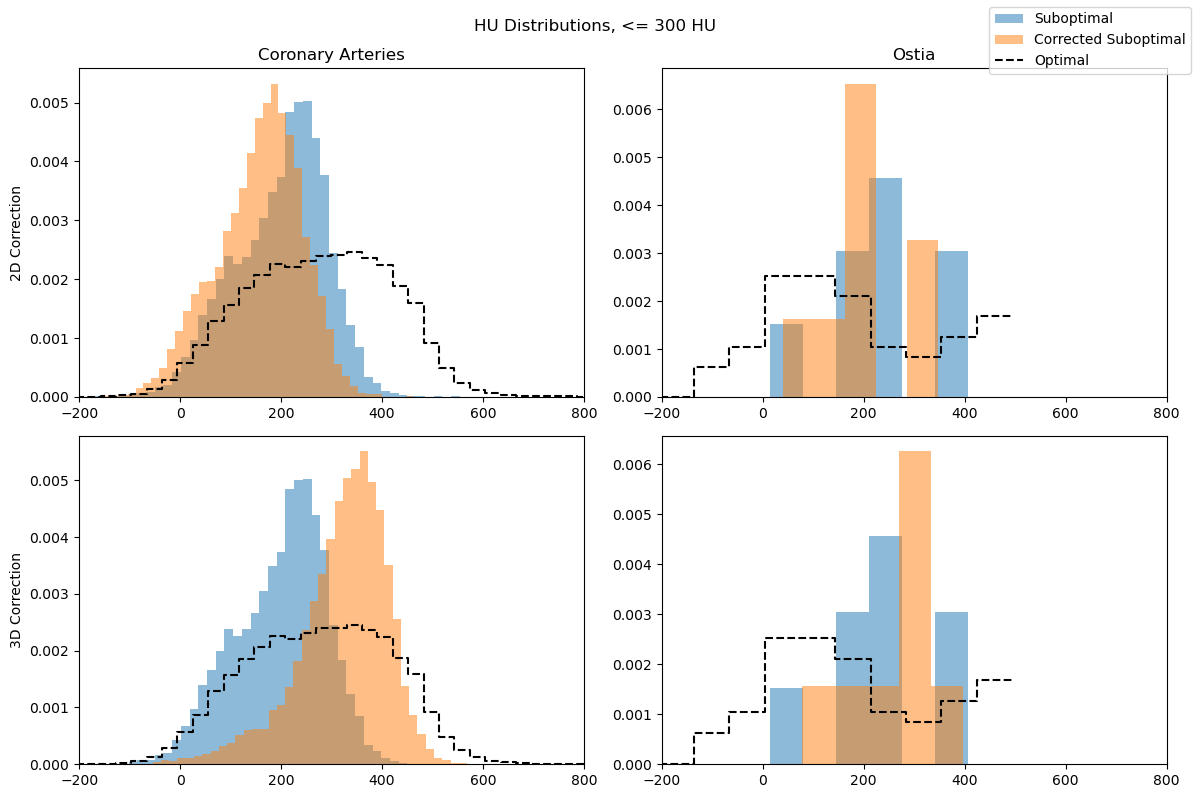

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("HU Distributions, <= 300 HU")

for ax in axes.flat:
    ax.set_xlim(-200, 800)
#     ax.set_ylim(0, 0.0075)
#     ax[i, j].set_yticks([])

for i, (raw, corrected) in enumerate(
    [[og_voxels, corrected_voxels_2D], [og_voxels, corrected_voxels_3D]]
):
    for j, tag in enumerate(["centerlines", "ostia"]):
        eval_u.plot_histograms(
            raw[ScanType.LOW][tag],
            corrected[ScanType.LOW][tag],
            raw[ScanType.OPT][tag],
            ax=axes[i, j],
            nbins=80 if j == 0 else 20,
        )

axes[0, 0].set_title("Coronary Arteries")
axes[0, 1].set_title("Ostia")
axes[0, 0].set_ylabel("2D Correction")
axes[1, 0].set_ylabel("3D Correction")

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels)
fig.tight_layout()
plt.show()
plt.close(fig)

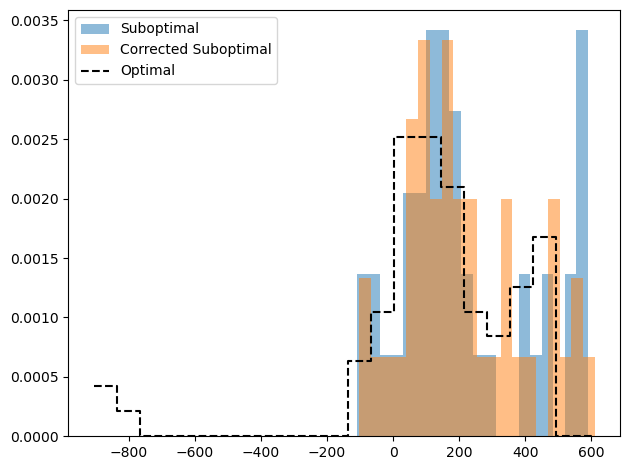

In [12]:
ax = eval_u.plot_histograms(
    og_voxels[ScanType.HIGH]["ostia"],
    corrected_voxels_3D[ScanType.HIGH]["ostia"],
    og_voxels[ScanType.OPT]["ostia"],
    nbins=20
)
# ax.set_xlim(-200, 800)
plt.tight_layout()
plt.legend()
plt.show()
plt.close(ax.get_figure())